# The Colonial Origins of Comparative Development - Project by Sweta Gangopadhyay and Tianxiong Hu

## Introduction

### Source of Data and Paper Description


 For our research project, we have decided to look at a paper by Daron Acemoglu, Simon Johnson and James A. Robinson called "The Colonial Origins of Comparative Development". The paper is a study about what factors have led to differences in economic development across countries that were former colonies. The paper looks at primarily British and French colonies and compares their GDP per capita in 1995. The authors of the paper hypothesized that the GDP per capita of the former colonies were closely tied to the quality of institutions in the countries. If institutions like governmental bodies and educational bodies were more extractive (i.e. took away resources/power from the citizens of the country), Acemoglu et al. hypothesized that these extractive institutions would lead to fewer property rights, fewer investments in human capital, and hence lower GDPs. They also looked at what caused institutions to be extractive vs. non-extractive. They hypothesized that colonizers only set up good institutions if they themselves settled in the colony, making the European settler mortality rate an effective proxy for institution quality.  
 
 This is the link to the data and tables used by the authors in their paper:
 https://economics.mit.edu/faculty/acemoglu/data/ajr2001
 
 For the purpose of this project we used their data set to recreate some of their findings and then extend the paper by adding some of our hypotheses and tests as well. The data set is a collection of GDP per capita, avg. protection against expropriation (their measure of institution quality with higher numbers corresponding to better institutions), natural resource reserves (like oil, gold, zinc, etc.), geography, climate, colonizer details (like colonizer country, years since independence, duration of colonization etc.), and ethnographic factors like religion, language and ethnicity. The remaining variables in the data set used by the paper are not used in this project, and so are not mentioned. 


### Our Take on the Data

  In this project, we aim to explore the data set a little more and look at the trends in the data. With our collection of former colony/country data, we looked at the biggest colonizers, wealth by continent and even correlations between variables to test through regressions later. We also recreated the base ordinary least squares regressions found in the paper and extended their analysis by adding and testing against many other variables, based on our own hypotheses (found below).

### Hypotheses

1. We want to look at the effect of:
    * Religion
    * Ethnicity
    * Language

On the main variables of interest in the paper - insititution quality and log GDP. We think that with greater ethnographic diversity it will be more difficult to coordinate economic policies that will satisfy all groups - which may mean lower economic performance. 

However, we are also open to the idea that with greater diversity (like immigration), economic activity may actually be very high. We hope to run correlations and regressions to test these relationships and see whether our hypotheses are correct.

## Importing the data

In [2]:
# running the necessary packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
%matplotlib inline
import matplotlib.pyplot as plt
# reading the data in
df = pd.read_csv('/Users/Sweta/Desktop/Python/complete.data.iv.csv',encoding = 'latin-1', error_bad_lines = False)

## Cleaning the data

In [3]:
df

,shortnam,name,yr.col,colonizer,continent,inst.age.1817,inst.age.1900,currentinst,s.america,mortality,...,yellow,idep,post1900,dur,Country Code,GDP05,Ethnic,Language,Religion,rol
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.34
1,AFG,Afganistan,NaN,NaN,Asia,NaN,NaN,NaN,0.0,NaN,...,0.0,1919.0,1.0,NaN,AFG,389.4163578,0.769345,0.614146,0.271684,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65
3,AGO,Angola,1483.0,Portugal,Africa,334.0,417.0,172.0,0.0,280.00,...,1.0,1975.0,1.0,66.0,AGO,2387.825414,0.786720,0.787019,0.627644,0.58
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ARE,United Arab Emirates,1507.0,Portugal,Asia,310.0,393.0,26.0,0.0,NaN,...,0.0,1971.0,1.0,NaN,ARE,56199.02927,0.625200,0.487369,0.331038,0.81
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.81
7,ARG,Argentina,1512.0,Spain,South America,305.0,388.0,124.0,1.0,68.90,...,0.0,1816.0,0.0,292.0,ARG,8522.522732,0.255000,0.061754,0.223621,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ARM,Armenia,NaN,NaN,Asia,NaN,NaN,32.0,0.0,NaN,...,0.0,1991.0,1.0,NaN,ARM,2571.985756,0.127154,0.129054,0.457561,0.77


We wanted to replace all the null values to be dropped later from the variables that we will use in our analyses.

In [4]:
df = df.replace('NaN', np.nan)
df = df.replace('..', np.nan)

In [5]:
df

,shortnam,name,yr.col,colonizer,continent,inst.age.1817,inst.age.1900,currentinst,s.america,mortality,...,yellow,idep,post1900,dur,Country Code,GDP05,Ethnic,Language,Religion,rol
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.34
1,AFG,Afganistan,NaN,NaN,Asia,NaN,NaN,NaN,0.0,NaN,...,0.0,1919.0,1.0,NaN,AFG,389.4163578,0.769345,0.614146,0.271684,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65
3,AGO,Angola,1483.0,Portugal,Africa,334.0,417.0,172.0,0.0,280.00,...,1.0,1975.0,1.0,66.0,AGO,2387.825414,0.786720,0.787019,0.627644,0.58
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ARE,United Arab Emirates,1507.0,Portugal,Asia,310.0,393.0,26.0,0.0,NaN,...,0.0,1971.0,1.0,NaN,ARE,56199.02927,0.625200,0.487369,0.331038,0.81
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.81
7,ARG,Argentina,1512.0,Spain,South America,305.0,388.0,124.0,1.0,68.90,...,0.0,1816.0,0.0,292.0,ARG,8522.522732,0.255000,0.061754,0.223621,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ARM,Armenia,NaN,NaN,Asia,NaN,NaN,32.0,0.0,NaN,...,0.0,1991.0,1.0,NaN,ARM,2571.985756,0.127154,0.129054,0.457561,0.77


In [6]:
df = df.dropna(subset=['name','continent', 'colonizer', 'GDP05', 'Ethnic', 'Language', 'Religion', 'dur', 'logem4', 'avexpr'])
df

,shortnam,name,yr.col,colonizer,continent,inst.age.1817,inst.age.1900,currentinst,s.america,mortality,...,yellow,idep,post1900,dur,Country Code,GDP05,Ethnic,Language,Religion,rol
3,AGO,Angola,1483.0,Portugal,Africa,334.0,417.0,172.0,0.0,280.00,...,1.0,1975.0,1.0,66.0,AGO,2387.825414,0.786720,0.787019,0.627644,0.58
7,ARG,Argentina,1512.0,Spain,South America,305.0,388.0,124.0,1.0,68.90,...,0.0,1816.0,0.0,292.0,ARG,8522.522732,0.255000,0.061754,0.223621,NaN
11,AUS,Australia,1788.0,England,Other,29.0,112.0,10.0,0.0,8.55,...,1.0,1901.0,1.0,113.0,AUS,48760.35517,0.092902,0.334950,0.821085,0.51
23,BFA,Burkina Faso,1896.0,France,Africa,0.0,4.0,153.0,0.0,280.00,...,1.0,1960.0,1.0,8.0,BFA,511.9675905,0.737738,0.722777,0.579799,0.58
25,BGD,Bangladesh,1537.0,Portugal,Asia,280.0,363.0,129.0,0.0,71.41,...,1.0,1971.0,1.0,190.0,BGD,598.6174259,0.045434,0.092485,0.209050,0.81
31,BHS,"Bahamas, The",1718.0,England,Other,99.0,182.0,77.0,0.0,85.00,...,1.0,1973.0,1.0,256.0,BHS,31023.04722,0.422845,0.185494,0.681459,NaN
39,BOL,Bolivia,1524.0,Spain,South America,293.0,376.0,155.0,1.0,71.00,...,1.0,1825.0,0.0,292.0,BOL,1720.099032,0.739625,0.223982,0.208469,0.89
41,BRA,Brazil,1500.0,Portugal,South America,317.0,400.0,130.0,1.0,71.00,...,1.0,1822.0,0.0,322.0,BRA,9495.48465,0.540836,0.046844,0.605430,NaN
51,CAN,Canada,1535.0,France,Other,282.0,365.0,17.0,0.0,16.10,...,0.0,1867.0,0.0,333.0,CAN,47181.56239,0.712420,0.577184,0.695768,NaN
59,CIV,Côte d'Ivoire,1843.0,France,Africa,0.0,57.0,177.0,0.0,668.00,...,1.0,1960.0,1.0,67.0,CIV,1216.208471,0.820424,0.784203,0.755108,0.44


In [7]:
df['name'].nunique()

60

So we have around 60 unique entries of data in this data set we can use for our analyses. We wanted to check the total number of column names as well:

In [8]:
df.columns

Index(['shortnam', 'name', 'yr.col', 'colonizer', 'continent', 'inst.age.1817',
       'inst.age.1900', 'currentinst', 's.america', 'mortality', 'imputedmort',
       'logem4', 'extmort4', 'excolony', 'logpgp12', 'lat_abst', 'avexpr',
       'avelf', 'logpgp95', 'loghjypl', 'catho80', 'muslim80', 'no_cpm80',
       'edes1975', 'malfal94', 'leb95', 'imr95', 'meantemp', 'lt100km',
       'latabs', 'euro1900', 'democ1', 'cons1', 'indtime', 'democ00a',
       'cons00a', 'africa', 'asia', 'other', 'f_brit', 'f_french', 'rich4',
       'sjlofr', 'baseco', 'temp1', 'temp2', 'temp3', 'temp4', 'temp5',
       'humid1', 'humid2', 'humid3', 'humid4', 'steplow', 'deslow', 'stepmid',
       'desmid', 'drystep', 'drywint', 'landlock', 'goldm', 'iron', 'silv',
       'zinc', 'oilres', 'yellow', 'idep', 'post1900', 'dur', 'Country Code',
       'GDP05', 'Ethnic', 'Language', 'Religion', 'rol'],
      dtype='object')

Since we aren't using all the columns, we dropped the unused variable columns from the data set:

In [9]:
df = df.drop(['shortnam','inst.age.1817',
       'inst.age.1900', 'currentinst', 'imputedmort', 'extmort4', 'excolony', 'no_cpm80',
       'edes1975', 'malfal94', 'leb95', 'imr95',  'lt100km','euro1900', 'democ1', 'cons1',
       'indtime', 'democ00a', 'cons00a','sjlofr', 'temp1', 'temp2', 'temp3', 'temp4', 'temp5',
       'humid1', 'humid2', 'humid3', 'humid4', 'steplow', 'deslow', 'stepmid',
       'desmid', 'drystep', 'drywint', 'Country Code', 'rol']
        , axis = 1)
df

,name,yr.col,colonizer,continent,s.america,mortality,logem4,logpgp12,lat_abst,avexpr,...,zinc,oilres,yellow,idep,post1900,dur,GDP05,Ethnic,Language,Religion
3,Angola,1483.0,Portugal,Africa,0.0,280.00,5.634789,8.716929,0.136667,5.363636,...,0.0,146000.0,1.0,1975.0,1.0,66.0,2387.825414,0.786720,0.787019,0.627644
7,Argentina,1512.0,Spain,South America,1.0,68.90,4.232656,NaN,0.377778,6.386364,...,0.0,46900.0,0.0,1816.0,0.0,292.0,8522.522732,0.255000,0.061754,0.223621
11,Australia,1788.0,England,Other,0.0,8.55,2.145931,10.705441,0.300000,9.318182,...,12.0,99100.0,1.0,1901.0,1.0,113.0,48760.35517,0.092902,0.334950,0.821085
23,Burkina Faso,1896.0,France,Africa,0.0,280.00,5.634789,7.321831,0.144445,4.454545,...,0.0,0.0,1.0,1960.0,1.0,8.0,511.9675905,0.737738,0.722777,0.579799
25,Bangladesh,1537.0,Portugal,Asia,0.0,71.41,4.268438,7.540647,0.266667,5.136364,...,0.0,0.0,1.0,1971.0,1.0,190.0,598.6174259,0.045434,0.092485,0.209050
31,"Bahamas, The",1718.0,England,Other,0.0,85.00,4.442651,10.361836,0.268333,7.500000,...,0.0,0.0,1.0,1973.0,1.0,256.0,31023.04722,0.422845,0.185494,0.681459
39,Bolivia,1524.0,Spain,South America,1.0,71.00,4.262680,8.571013,0.188889,5.636364,...,0.0,14300.0,1.0,1825.0,0.0,292.0,1720.099032,0.739625,0.223982,0.208469
41,Brazil,1500.0,Portugal,South America,1.0,71.00,4.262680,9.385043,0.111111,7.909091,...,1.0,19400.0,1.0,1822.0,0.0,322.0,9495.48465,0.540836,0.046844,0.605430
51,Canada,1535.0,France,Other,0.0,16.10,2.778819,10.658045,0.666667,9.727273,...,15.0,185000.0,0.0,1867.0,0.0,333.0,47181.56239,0.712420,0.577184,0.695768
59,Côte d'Ivoire,1843.0,France,Africa,0.0,668.00,6.504288,7.620299,0.088889,7.000000,...,0.0,7460.0,1.0,1960.0,1.0,67.0,1216.208471,0.820424,0.784203,0.755108


Setting the index to Country Name:

In [10]:
df.set_index('name')
df

,name,yr.col,colonizer,continent,s.america,mortality,logem4,logpgp12,lat_abst,avexpr,...,zinc,oilres,yellow,idep,post1900,dur,GDP05,Ethnic,Language,Religion
3,Angola,1483.0,Portugal,Africa,0.0,280.00,5.634789,8.716929,0.136667,5.363636,...,0.0,146000.0,1.0,1975.0,1.0,66.0,2387.825414,0.786720,0.787019,0.627644
7,Argentina,1512.0,Spain,South America,1.0,68.90,4.232656,NaN,0.377778,6.386364,...,0.0,46900.0,0.0,1816.0,0.0,292.0,8522.522732,0.255000,0.061754,0.223621
11,Australia,1788.0,England,Other,0.0,8.55,2.145931,10.705441,0.300000,9.318182,...,12.0,99100.0,1.0,1901.0,1.0,113.0,48760.35517,0.092902,0.334950,0.821085
23,Burkina Faso,1896.0,France,Africa,0.0,280.00,5.634789,7.321831,0.144445,4.454545,...,0.0,0.0,1.0,1960.0,1.0,8.0,511.9675905,0.737738,0.722777,0.579799
25,Bangladesh,1537.0,Portugal,Asia,0.0,71.41,4.268438,7.540647,0.266667,5.136364,...,0.0,0.0,1.0,1971.0,1.0,190.0,598.6174259,0.045434,0.092485,0.209050
31,"Bahamas, The",1718.0,England,Other,0.0,85.00,4.442651,10.361836,0.268333,7.500000,...,0.0,0.0,1.0,1973.0,1.0,256.0,31023.04722,0.422845,0.185494,0.681459
39,Bolivia,1524.0,Spain,South America,1.0,71.00,4.262680,8.571013,0.188889,5.636364,...,0.0,14300.0,1.0,1825.0,0.0,292.0,1720.099032,0.739625,0.223982,0.208469
41,Brazil,1500.0,Portugal,South America,1.0,71.00,4.262680,9.385043,0.111111,7.909091,...,1.0,19400.0,1.0,1822.0,0.0,322.0,9495.48465,0.540836,0.046844,0.605430
51,Canada,1535.0,France,Other,0.0,16.10,2.778819,10.658045,0.666667,9.727273,...,15.0,185000.0,0.0,1867.0,0.0,333.0,47181.56239,0.712420,0.577184,0.695768
59,Côte d'Ivoire,1843.0,France,Africa,0.0,668.00,6.504288,7.620299,0.088889,7.000000,...,0.0,7460.0,1.0,1960.0,1.0,67.0,1216.208471,0.820424,0.784203,0.755108


## Creating subsets of data based on continent

For our analyses, we wanted to look at the characteristics of the data set first, specifically to see what the differences were between colonies from different continents. Hence, we made subsets of the data based on continent:

In [11]:
Asia = df[df.continent == 'Asia']
Africa = df[df.continent == 'Africa']
South_America = df[df.continent == 'South America']

In [12]:
Asia

,name,yr.col,colonizer,continent,s.america,mortality,logem4,logpgp12,lat_abst,avexpr,...,zinc,oilres,yellow,idep,post1900,dur,GDP05,Ethnic,Language,Religion
25,Bangladesh,1537.0,Portugal,Asia,0.0,71.41,4.268438,7.540647,0.266667,5.136364,...,0.0,0.0,1.0,1971.0,1.0,190.0,598.6174259,0.045434,0.092485,0.209050
123,"Hong Kong SAR, China",1842.0,England,Asia,0.0,14.90,2.701361,10.857952,0.246111,8.136364,...,0.0,0.0,0.0,NaN,1.0,154.0,27688.69844,0.061952,0.212774,0.419110
133,Indonesia,1512.0,Portugal,Asia,0.0,170.00,5.135798,8.508344,0.055600,7.590909,...,0.0,29700.0,1.0,1945.0,1.0,150.0,2519.509842,0.735134,0.767999,0.234027
135,India,1765.0,England,Asia,0.0,48.63,3.884241,8.262562,0.222200,8.272727,...,7.0,6750.0,0.0,1947.0,1.0,190.0,971.2297607,0.418200,0.806905,0.326023
171,Sri Lanka,1505.0,Portugal,Asia,0.0,69.80,4.245634,8.739891,0.077778,6.045455,...,0.0,0.0,1.0,1948.0,1.0,133.0,2132.442191,0.415000,0.464456,0.485296
207,Malaysia,1511.0,Portugal,Asia,0.0,17.70,2.873565,9.749323,0.025556,7.954545,...,0.0,192000.0,1.0,1957.0,1.0,131.0,7983.952569,0.587962,0.596952,0.665688
227,Pakistan,1857.0,England,Asia,0.0,36.99,3.610648,7.969205,0.333333,6.045455,...,0.0,3220.0,1.0,1947.0,1.0,190.0,974.5372983,0.709800,0.719037,0.384829
259,Singapore,1819.0,England,Asia,0.0,17.70,2.873565,11.031711,0.013556,9.318182,...,0.0,0.0,1.0,1965.0,1.0,140.0,40020.26016,0.385674,0.383518,0.656129
313,Vietnam,1887.0,France,Asia,0.0,140.00,4.941642,8.198421,0.177778,6.409091,...,0.0,7140.0,1.0,1945.0,1.0,58.0,1012.370707,0.238308,0.237709,0.508025


In [13]:
Africa

,name,yr.col,colonizer,continent,s.america,mortality,logem4,logpgp12,lat_abst,avexpr,...,zinc,oilres,yellow,idep,post1900,dur,GDP05,Ethnic,Language,Religion
3,Angola,1483.0,Portugal,Africa,0.0,280.00,5.634789,8.716929,0.136667,5.363636,...,0.0,146000.0,1.0,1975.0,1.0,66.0,2387.825414,0.786720,0.787019,0.627644
23,Burkina Faso,1896.0,France,Africa,0.0,280.00,5.634789,7.321831,0.144445,4.454545,...,0.0,0.0,1.0,1960.0,1.0,8.0,511.9675905,0.737738,0.722777,0.579799
59,Côte d'Ivoire,1843.0,France,Africa,0.0,668.00,6.504288,7.620299,0.088889,7.000000,...,0.0,7460.0,1.0,1960.0,1.0,67.0,1216.208471,0.820424,0.784203,0.755108
61,Cameroon,1884.0,Germany,Africa,0.0,280.00,5.634789,7.758745,0.066667,6.454545,...,0.0,31900.0,1.0,1960.0,1.0,76.0,1264.1544,0.863490,0.889789,0.733753
63,"Congo, Dem. Rep.",1885.0,Belgium,Africa,0.0,240.00,5.480639,8.395268,0.011111,4.681818,...,0.0,338000.0,1.0,1960.0,1.0,77.0,2503.312055,0.874726,0.870472,0.702141
83,Algeria,1830.0,France,Africa,0.0,NaN,4.359270,9.049626,0.311111,6.500000,...,0.0,339000.0,0.0,1962.0,1.0,132.0,4273.312751,0.339400,0.442662,0.009128
87,"Egypt, Arab Rep.",1798.0,France,Africa,0.0,67.80,4.216562,8.813373,0.300000,6.772727,...,0.0,111000.0,0.0,1922.0,1.0,74.0,2112.48797,0.183592,0.023699,0.197880
95,Ethiopia,1896.0,Italy,Africa,0.0,26.00,3.258096,7.037666,0.088889,5.727273,...,0.0,0.0,1.0,-2000.0,0.0,0.0,232.7832002,0.723472,0.807323,0.624868
103,Gabon,1875.0,France,Africa,0.0,280.00,5.634789,9.685675,0.011111,7.818182,...,0.0,579000.0,1.0,1960.0,1.0,98.0,9579.493437,0.768960,0.782083,0.667441
109,Ghana,1874.0,England,Africa,0.0,668.00,6.504288,7.624223,0.088889,6.272727,...,0.0,30.0,1.0,1957.0,1.0,90.0,1089.481796,0.673332,0.673088,0.798675


In [14]:
South_America

,name,yr.col,colonizer,continent,s.america,mortality,logem4,logpgp12,lat_abst,avexpr,...,zinc,oilres,yellow,idep,post1900,dur,GDP05,Ethnic,Language,Religion
7,Argentina,1512.0,Spain,South America,1.0,68.9,4.232656,NaN,0.377778,6.386364,...,0.0,46900.0,0.0,1816.0,0.0,292.0,8522.522732,0.255000,0.061754,0.223621
39,Bolivia,1524.0,Spain,South America,1.0,71.0,4.262680,8.571013,0.188889,5.636364,...,0.0,14300.0,1.0,1825.0,0.0,292.0,1720.099032,0.739625,0.223982,0.208469
41,Brazil,1500.0,Portugal,South America,1.0,71.0,4.262680,9.385043,0.111111,7.909091,...,1.0,19400.0,1.0,1822.0,0.0,322.0,9495.48465,0.540836,0.046844,0.605430
65,Colombia,1499.0,Spain,South America,1.0,71.0,4.262680,9.266961,0.044444,7.318182,...,0.0,57.0,1.0,1810.0,0.0,320.0,5312.082352,0.601400,0.019268,0.147835
71,Costa Rica,1502.0,Spain,South America,1.0,NaN,4.357990,9.468531,0.111111,7.045455,...,0.0,0.0,1.0,1821.0,0.0,314.0,6954.039206,0.236800,0.048912,0.240958
81,Dominican Republic,1492.0,Spain,South America,1.0,130.0,4.867535,9.230497,0.211111,6.181818,...,0.0,0.0,1.0,1844.0,0.0,352.0,4414.812085,0.429400,0.039473,0.311844
85,Ecuador,1563.0,Spain,South America,1.0,71.0,4.262680,9.189732,0.022222,6.545455,...,0.0,141.0,0.0,1822.0,0.0,277.0,4286.515247,0.655000,0.130812,0.141712
119,Guatemala,1519.0,Spain,South America,1.0,71.0,4.262680,8.537425,0.170000,5.136364,...,0.0,2700.0,1.0,1821.0,0.0,143.0,2638.29047,0.512200,0.458593,0.375324
125,Honduras,1524.0,Spain,South America,1.0,78.1,4.357990,8.353066,0.166667,5.318182,...,0.0,0.0,1.0,1821.0,0.0,272.0,1799.490332,0.186700,0.055289,0.235716
149,Jamaica,1494.0,Spain,South America,1.0,130.0,4.867535,NaN,0.201667,7.090909,...,0.0,0.0,1.0,1962.0,1.0,307.0,4925.277388,0.412894,0.109805,0.615961


# Descriptive Statistics

These are the basic descriptive statistics for our continent subsets to get a general feel for the data. We specifically looked at the log of GDP per capita variable (or country wealth) across these continents.

### Average Log GDP By Continent

In [9]:
df.groupby('continent')['logpgp95'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,28.0,7.378724,0.799586,6.109248,6.829750,7.335856,7.815874,8.907883
Asia,14.0,8.593545,1.181823,6.877296,7.447314,8.496450,9.759594,10.146430
Other,7.0,9.496218,0.771269,7.904704,9.356255,9.756147,9.942210,10.215740
South America,18.0,8.510876,0.471677,7.544332,8.229472,8.598778,8.829746,9.133459


In [27]:
Asia = df[df.continent == 'Asia']
Africa = df[df.continent == 'Africa']
South_America = df[df.continent == 'South America']

Text(0.5,1,'Avg. GDP by Continent in 2005')

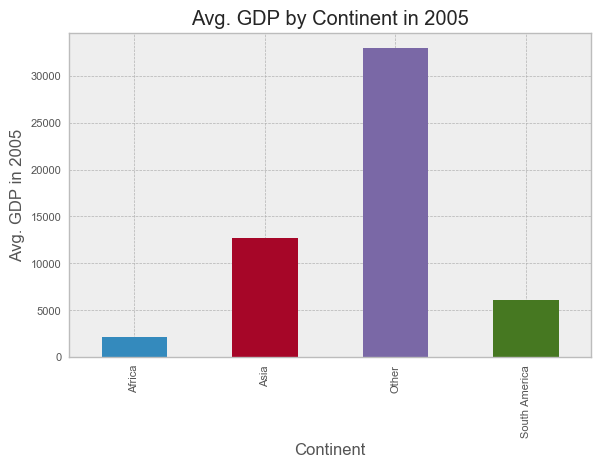

In [99]:
fig,ax = plt.subplots()
plt.style.use('bmh')
df.groupby('continent')['GDP05'].mean().plot.bar(x = 'continent', y = 'GDP05', ax=ax, figsize = (6,4))
ax.set_ylabel('Avg. GDP in 2005')
ax.set_xlabel('Continent')
ax.set_title('Avg. GDP by Continent in 2005')

The continent with the highest average Log GDP is "Other," which includes countries such as the US and Canada. This makes sense given that US and Canada are so called 'Neo-Europes' with very similar institutions as their colonizers like Britain and France. Other countries that are in the Neo-Europe space are Australia and New Zealand. 

### Average Log GDP Within Continent

Text(0.5,1,'Avg. GDP by Country in Asia in 2005')

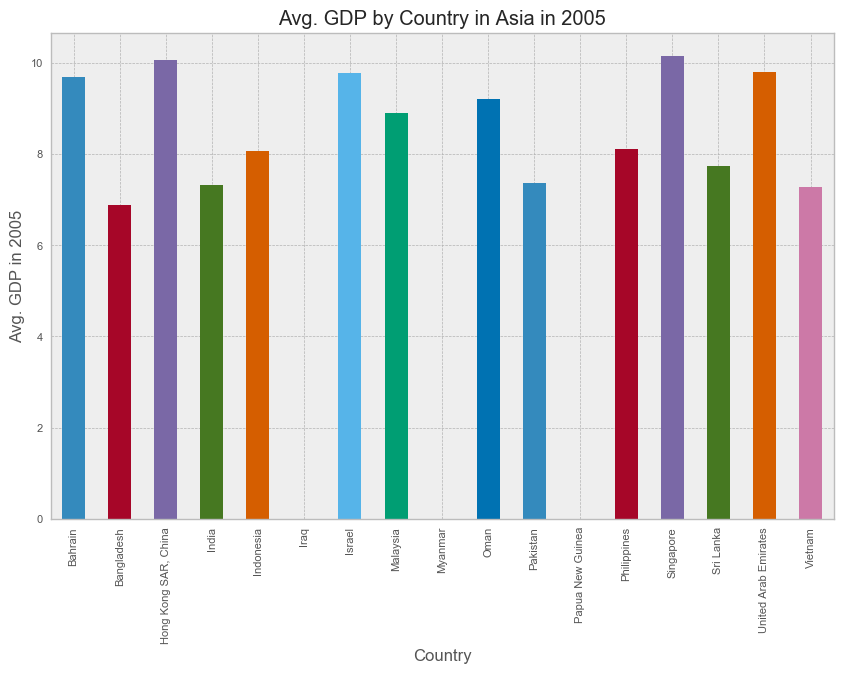

In [90]:
fig,ax = plt.subplots()
plt.style.use('bmh')
Asia.groupby('name')['logpgp95'].mean().plot.bar(x = 'name', y = 'GDP05', ax=ax, figsize = (9,6))
ax.set_ylabel('Avg. GDP in 2005')
ax.set_xlabel('Country')
ax.set_title('Avg. GDP by Country in Asia in 2005')

Former colonies in Asia have the second weakthiest among the rest of the three continents, but withing the continent itself there are significant variations in the GDP data. Trading-heavy countries like Singapore and China (Hong Kong) outperform Bangladesh and Pakistan GDP-wise by a significant margin. This makes sense as colonizers would set up trading ports in coastal colonies which would encourage investment in local infrastructure and insitutions (when compared to landlocked countries).  

Text(0.5,1,'Avg. GDP by Country in Africa in 2005')

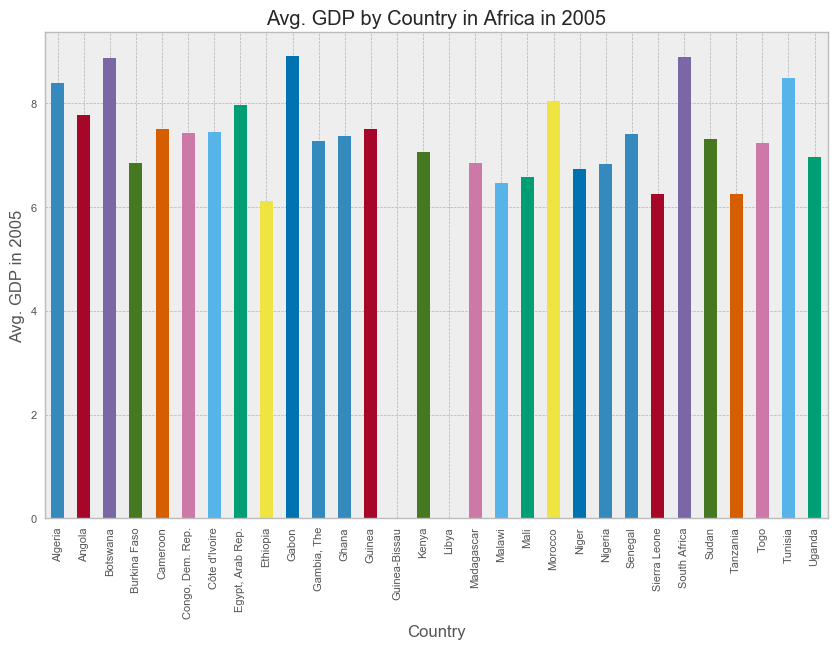

In [89]:
fig,ax = plt.subplots()
plt.style.use('bmh')
Africa.groupby('name')['logpgp95'].mean().plot.bar(x = 'name', y = 'GDP05', ax=ax, figsize = (9,6))
ax.set_ylabel('Avg. GDP in 2005')
ax.set_xlabel('Country')
ax.set_title('Avg. GDP by Country in Africa in 2005')

Most of the GDP data in Africa seems to be on the same level - besides some outliers like Gabon, South Africa and Botswana. It would be interesting to see whether these differences are due to the natural resources the country has (i.e. South Africa has a huge diamond manufacturing industry, the presence of oil etc.). It would also be interesting to see whether trading-heavy countries outperformed the non-trading heavy countries, as shown in the Asia analysis.

Text(0.5,1,'Avg. GDP by Country in South America in 2005')

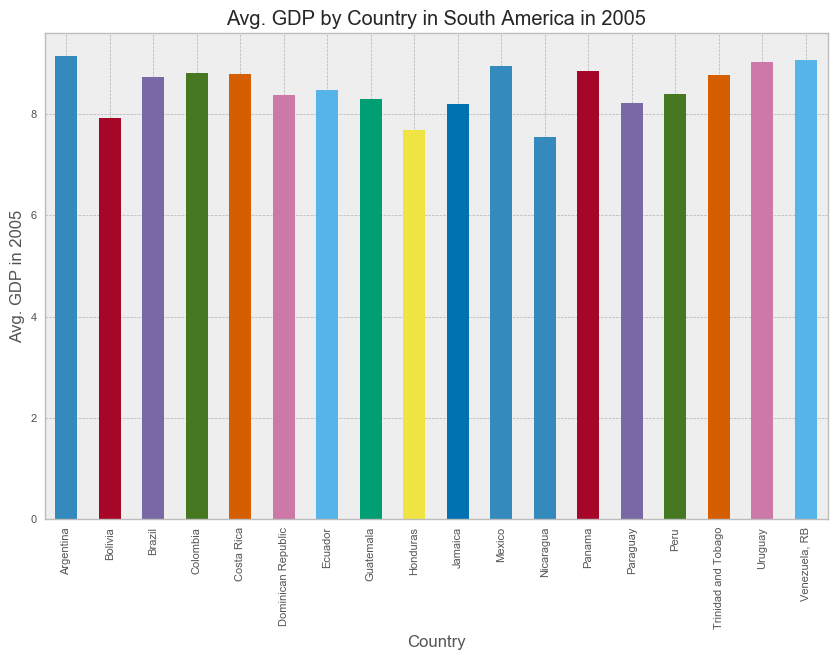

In [86]:
fig,ax = plt.subplots()
plt.style.use('bmh')
South_America.groupby('name')['logpgp95'].mean().plot.bar(x = 'name', y = 'GDP05', ax=ax, figsize = (9,6))
ax.set_ylabel('Avg. GDP in 2005')
ax.set_xlabel('Country')
ax.set_title('Avg. GDP by Country in South America in 2005')

Low standard deviations are observed in GDP data in South America - showing these countries have similar wealth. 

## Ethnographic Factor Analysis

Next we wanted to see how each continent differed by ethnicity, religion and language diversity. 

Former African colonies have a significantly higher mean ethnic diversity score than other groups. Former African colonies as a whole also score the highest in language diversity. Institutional quality scores are somewhat similar among former Asian, African and South-American colonies with Asia out perform South-America by less than 0.3 points.

### Average Ethnic Diversity By Continent

In [32]:
df.groupby('continent')['Ethnic'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,30.0,0.693037,0.206160,0.039400,0.678450,0.738340,0.816371,0.930175
Asia,17.0,0.405358,0.198509,0.045434,0.271800,0.415000,0.506186,0.735134
Other,7.0,0.396580,0.250744,0.041432,0.244876,0.422845,0.554805,0.712420
South America,18.0,0.464937,0.177307,0.168900,0.294473,0.504400,0.589250,0.739625


Text(0.5,1,'Avg. Ethnic Diversity by Continent')

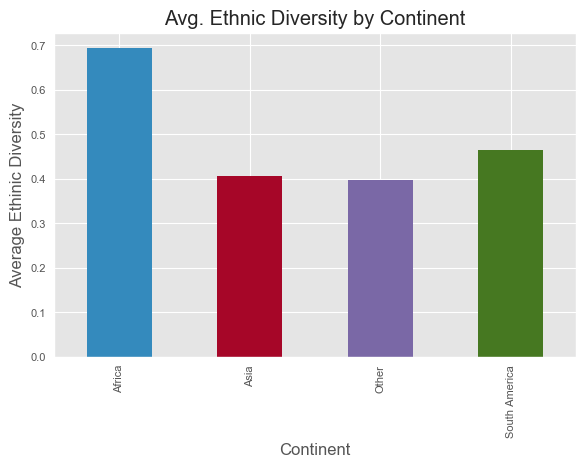

In [82]:
fig,ax = plt.subplots()
plt.style.use('bmh')
df.groupby('continent')['Ethnic'].mean().plot.bar(x = 'continent', y = 'avexpr', ax=ax, figsize = (6, 4))
ax.set_ylabel('Average Ethinic Diversity')
ax.set_xlabel('Continent')
ax.set_title('Avg. Ethnic Diversity by Continent')

### Average Language Diversity By Continent

In [34]:
df.groupby('continent')['Language'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,30.0,0.658580,0.282280,0.012422,0.614731,0.777302,0.847449,0.922679
Asia,17.0,0.481059,0.213443,0.092485,0.356743,0.464456,0.596952,0.835952
Other,7.0,0.239164,0.174610,0.068804,0.128172,0.185494,0.293160,0.577184
South America,18.0,0.166068,0.167775,0.019268,0.050506,0.095763,0.205766,0.597501


Text(0.5,1,'Avg. Language Diversity by Continent')

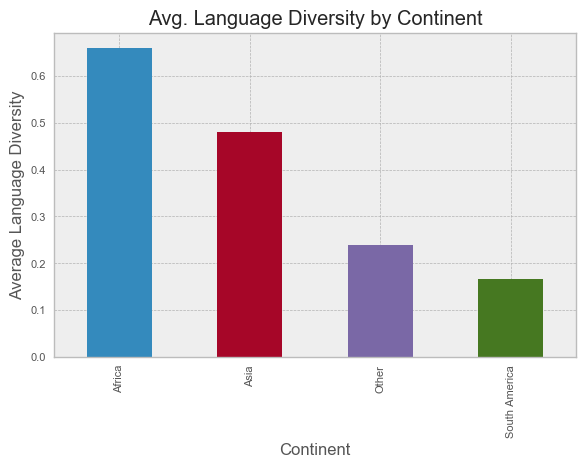

In [84]:
fig,ax = plt.subplots()
plt.style.use('bmh')
df.groupby('continent')['Language'].mean().plot.bar(x = 'continent', y = 'avexpr', ax=ax, figsize = (6,4))
ax.set_ylabel('Average Language Diversity')
ax.set_xlabel('Continent')
ax.set_title('Avg. Language Diversity by Continent')

### Average Religion Diversity By Continent

In [36]:
df.groupby('continent')['Religion'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,30.0,0.482906,0.282221,0.003463,0.198726,0.605722,0.693466,0.860260
Asia,17.0,0.417099,0.144154,0.197385,0.326023,0.419110,0.508025,0.665688
Other,7.0,0.677616,0.251865,0.122324,0.688614,0.787592,0.816047,0.824078
South America,18.0,0.319095,0.185745,0.135030,0.201203,0.238337,0.370201,0.793610


Text(0.5,1,'Avg. Religious Diversity by Continent')

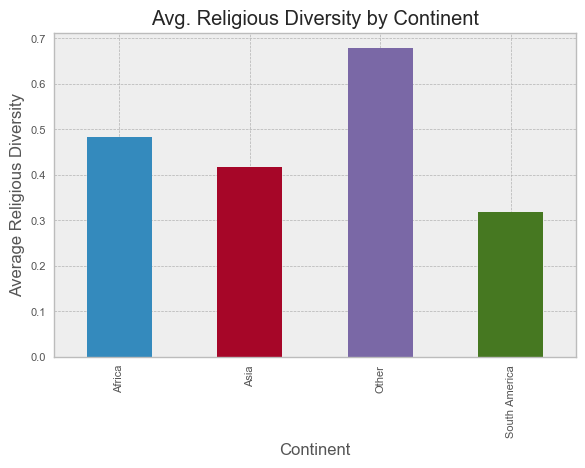

In [85]:
fig,ax = plt.subplots()
plt.style.use('bmh')
df.groupby('continent')['Religion'].mean().plot.bar(x = 'continent', y = 'avexpr', ax=ax, figsize = (6,4))
ax.set_ylabel('Average Religious Diversity')
ax.set_xlabel('Continent')
ax.set_title('Avg. Religious Diversity by Continent')

## Links to Paper - Mortality and Institution Quality Variables

The two sets of graphs below show what looks like an inverse relationship between the mortality rate and the institution quality (like found in the paper). So for example, Africa looks like it has the highest mortality rate - but it also has the lowest score for institution quality.

### Average Mortality By Continent

In [38]:
df.groupby('continent')['logem4'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,27.0,5.520789,1.226028,2.740840,4.728170,5.634789,6.232113,7.986165
Asia,11.0,3.928595,0.902237,2.701361,3.208710,3.884241,4.605040,5.135798
Other,7.0,2.926270,0.806432,2.145931,2.426991,2.778819,3.131255,4.442651
South America,18.0,4.451942,0.301373,4.232656,4.262680,4.310335,4.421486,5.095589


Text(0.5,1,'Mortality by Continent')

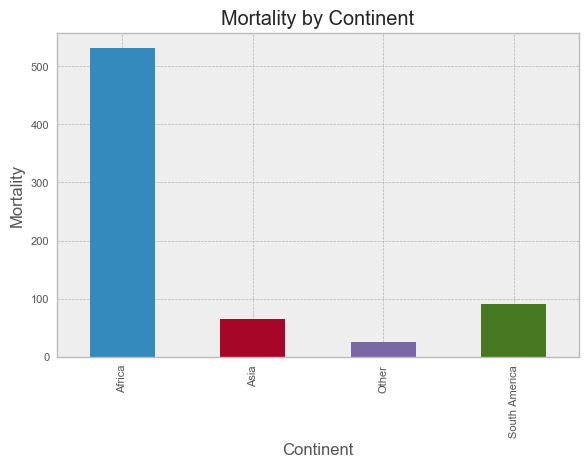

In [96]:
fig,ax = plt.subplots()
plt.style.use('bmh')
df.groupby('continent')['mortality'].mean().plot.bar(x = 'continent', y = 'mortality', ax=ax, figsize = (6,4))
ax.set_ylabel('Mortality')
ax.set_xlabel('Continent')
ax.set_title('Mortality by Continent')

### Average Institutional Quality By Continent

In [40]:
df.groupby('continent')['avexpr'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,30.0,5.983333,1.162397,4.000000,5.068182,6.159091,6.806818,8.272727
Asia,17.0,6.818182,1.781954,1.636364,6.045455,7.181818,8.000000,9.318182
Other,7.0,8.483766,1.601088,5.886364,7.363637,9.318182,9.727273,10.000000
South America,18.0,6.529040,0.863489,5.136364,5.806818,6.750000,7.125000,7.909091


Text(0.5,1,'Avg. Protection Against Expropriation by Continent')

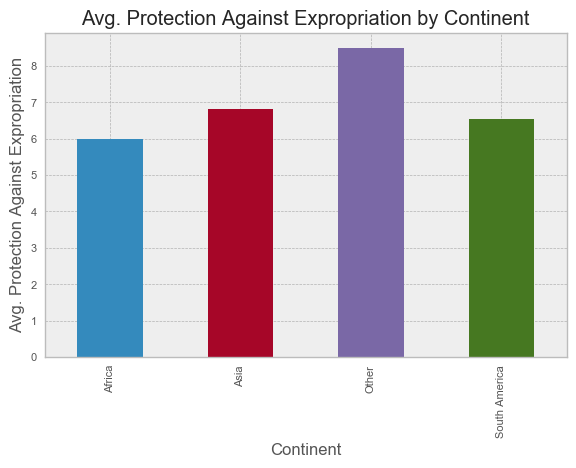

In [97]:
fig,ax = plt.subplots()
plt.style.use('bmh')
df.groupby('continent')['avexpr'].mean().plot.bar(x = 'continent', y = 'avexpr', ax=ax, figsize = (6,4))
ax.set_ylabel('Avg. Protection Against Expropriation')
ax.set_xlabel('Continent')
ax.set_title('Avg. Protection Against Expropriation by Continent')

## Most popular colonizers by continent

England and Portugal were the two biggest colonizers in Asia, together they owned over 75% of the former colonies in the region. There were more diversity among colonizers in Africa, and France, England and Germany together owned around 60% of the colonies in the Region. Former South American colonies were almost all owned by Spain, Portugal had a minor presence in the region and owned about 10% of the colonies in the region; this explains the former South American colonies' low scores in language and religion diversity.

Text(0.5,1,'Colonizers in South America')

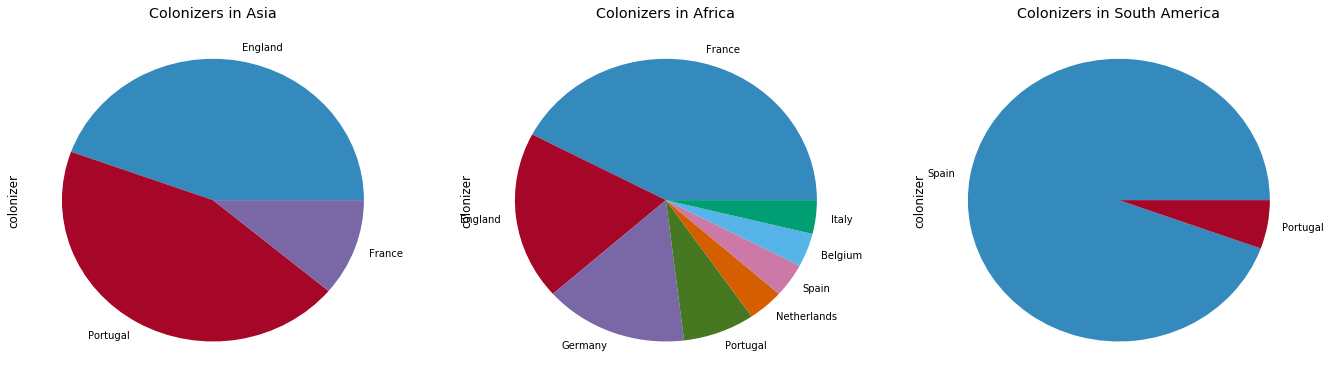

In [49]:
fig, ax = plt.subplots(1,3)
plt.style.use('bmh')
Asia['colonizer'].value_counts(normalize = True).plot.pie(ax=ax[0], figsize = (23,6.5))
Africa['colonizer'].value_counts(normalize = True).plot.pie(ax=ax[1], figsize = (23,6.5))
South_America['colonizer'].value_counts(normalize = True).plot.pie(ax=ax[2], figsize = (23,6.5))

ax[0].set_title('Colonizers in Asia', loc = 'center')
ax[1].set_title('Colonizers in Africa', loc = 'center')
ax[2].set_title('Colonizers in South America', loc = 'center')


In [45]:
df['GDP05'] = df['GDP05'].astype(float)

/Users/Sweta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
df.GDP05.dtype

dtype('float64')

# Correlation Analysis

Now that we have a basic understanding of what the data set looks like, we set out to look at the relationships between variables that have peaked our interest. We found out before that Africa had the greatest ethnic and language diversity - yet it had the worst institutions and the highest mortality rate. Hence, we first looked at the ethnographic factor correlations with the key variables of interest from the paper - the log GDP per capita and the avg. protection against expropriation risk (institution quality). 

## Correlation Matrix - Asia

  In former Asian colonies, there is a significant positive correlations (0.71) between Log GDP and institutional qualities. Religion diversity has a moderate position correlation with Log GDP (0.41). Log Mortality Rate appears to have a significant negative correlation (-0.71) with Log GDP. The relationship between variables such as language and ethnic diversity do not seem to correlate with Log GDP.
  
  Among dependent variables, language diversity and ethnic diversity appear to be somewhat strongly correlated (0.62); Log mortality rate and institutional quality are inversely correlated to a moderate extent (-0.40).

In [43]:
Asia[['logpgp95', 'Ethnic', 'Language', 'Religion','logem4','avexpr']].corr()

,logpgp95,Ethnic,Language,Religion,logem4,avexpr
logpgp95,1.000000,0.056694,-0.161760,0.414836,-0.731340,0.708982
Ethnic,0.056694,1.000000,0.619509,0.008644,0.029517,0.133945
Language,-0.161760,0.619509,1.000000,-0.226130,0.007985,0.139907
Religion,0.414836,0.008644,-0.226130,1.000000,-0.284543,0.243531
logem4,-0.731340,0.029517,0.007985,-0.284543,1.000000,-0.396405
avexpr,0.708982,0.133945,0.139907,0.243531,-0.396405,1.000000


Text(0,1,'Ethnolinguistic Correlations with GDP in Asia')

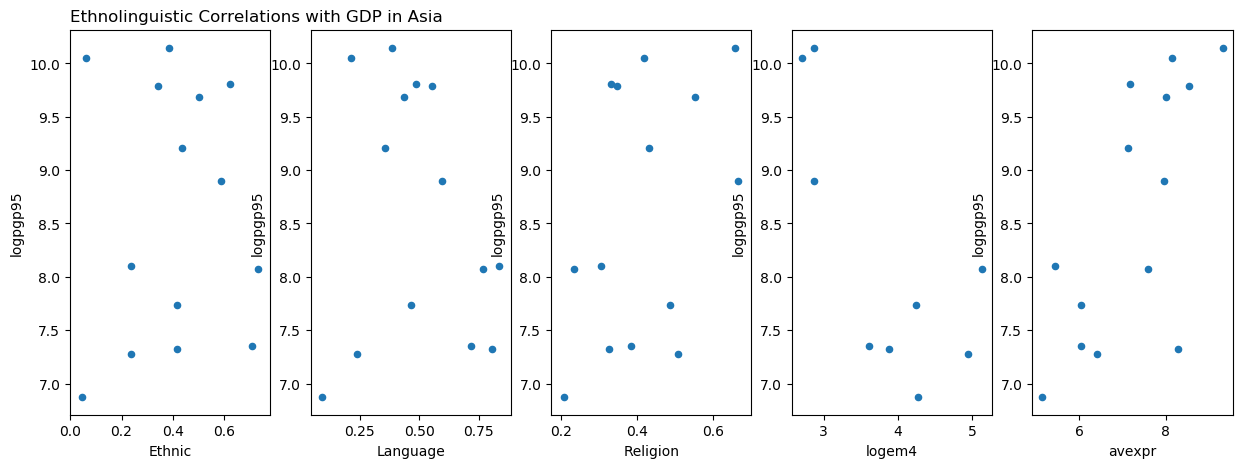

In [121]:
# Part (a)
fig, ax = plt.subplots(1,5)
plt.style.use('default')
Asia[['Ethnic', 'logpgp95']].plot.scatter('Ethnic', 'logpgp95', ax=ax[0], figsize = (15,5))
Asia[['Language', 'logpgp95']].plot.scatter('Language', 'logpgp95', ax=ax[1])
Asia[['Religion', 'logpgp95']].plot.scatter('Religion', 'logpgp95', ax=ax[2])
Asia[['logem4', 'logpgp95']].plot.scatter('logem4', 'logpgp95', ax=ax[3])
Asia[['avexpr', 'logpgp95']].plot.scatter('avexpr', 'logpgp95', ax=ax[4])

ax[0].set_title('Ethnolinguistic Correlations with GDP in Asia', loc = 'left')


# Correlation Matrix - South America
In former South American colonies, Institutional Quality is highly correlated with Log GDP (0.67) as found in the paper; Log Mortality Rate has a moderate negative correlation with Log GDP (-0.34). Other variables do not appear to have meaningful correlations with Log GDP.

Among Variables, Log Mortality rate has a positive correlation with Religion diversity (0.34) and a negative correlation with institutional quality. Other variables do not appear to correlate significantly with each other.

In [46]:
South_America[['logpgp95', 'Ethnic', 'Language', 'Religion', 'logem4','avexpr']].corr()

,logpgp95,Ethnic,Language,Religion,logem4,avexpr
logpgp95,1.000000,-0.001123,-0.159578,-0.077156,-0.338017,0.655918
Ethnic,-0.001123,1.000000,0.018092,0.102199,0.002339,-0.020068
Language,-0.159578,0.018092,1.000000,-0.111140,-0.022529,-0.291501
Religion,-0.077156,0.102199,-0.111140,1.000000,0.340568,0.228543
logem4,-0.338017,0.002339,-0.022529,0.340568,1.000000,-0.286551
avexpr,0.655918,-0.020068,-0.291501,0.228543,-0.286551,1.000000


Text(0,1,'Ethnolinguistic Correlations with GDP in South America')

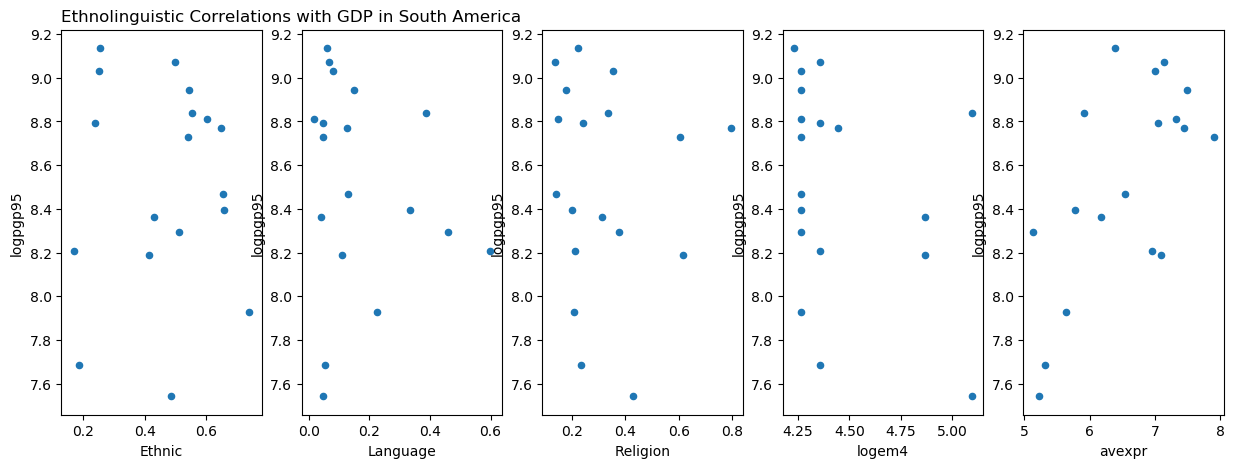

In [122]:
fig, ax = plt.subplots(1,5)
plt.style.use('default')
South_America[['Ethnic', 'logpgp95']].plot.scatter('Ethnic', 'logpgp95', ax=ax[0], figsize = (15,5))
South_America[['Language', 'logpgp95']].plot.scatter('Language', 'logpgp95', ax=ax[1])
South_America[['Religion', 'logpgp95']].plot.scatter('Religion', 'logpgp95', ax=ax[2])
South_America[['logem4', 'logpgp95']].plot.scatter('logem4', 'logpgp95', ax=ax[3])
South_America[['avexpr', 'logpgp95']].plot.scatter('avexpr', 'logpgp95', ax=ax[4])

ax[0].set_title('Ethnolinguistic Correlations with GDP in South America', loc = 'left')

# Correlation Matrix - Africa

Ethnicity (-0.48), Language (-0.32) and Log Mortality Rate (-0.43) all have moderate negative correlation with Log GDP. Institutional Quality is somewhat significantly correlated with Log GDP (0.49).

There is observed positive positive correlations within Language diversity, Religion and Ethnic diversity. 

In [49]:
Africa[['logpgp95', 'Ethnic', 'Language', 'Religion' ,'logem4','avexpr']].corr()

,logpgp95,Ethnic,Language,Religion,logem4,avexpr
logpgp95,1.000000,-0.482920,-0.324883,-0.171501,-0.431228,0.491988
Ethnic,-0.482920,1.000000,0.644236,0.556082,0.410236,-0.328907
Language,-0.324883,0.644236,1.000000,0.544359,0.263596,-0.048367
Religion,-0.171501,0.556082,0.544359,1.000000,0.056106,-0.019951
logem4,-0.431228,0.410236,0.263596,0.056106,1.000000,-0.101839
avexpr,0.491988,-0.328907,-0.048367,-0.019951,-0.101839,1.000000


Text(0,1,'Ethnolinguistic Correlations with GDP in Asia')

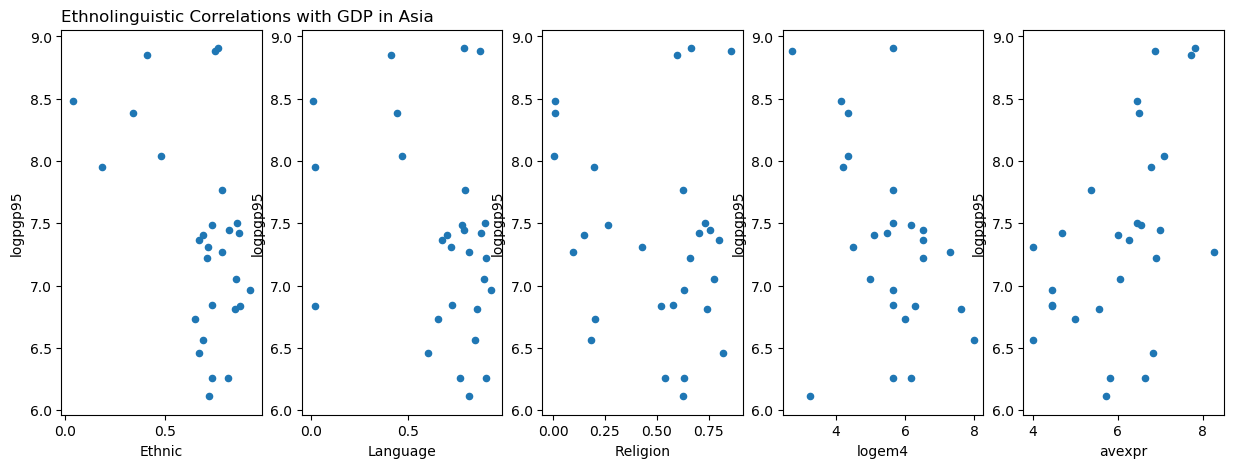

In [123]:
fig, ax = plt.subplots(1,5)
plt.style.use('default')
Africa[['Ethnic', 'logpgp95']].plot.scatter('Ethnic', 'logpgp95', ax=ax[0], figsize = (15,5))
Africa[['Language', 'logpgp95']].plot.scatter('Language', 'logpgp95', ax=ax[1])
Africa[['Religion', 'logpgp95']].plot.scatter('Religion', 'logpgp95', ax=ax[2])
Africa[['logem4', 'logpgp95']].plot.scatter('logem4', 'logpgp95', ax=ax[3])
Africa[['avexpr', 'logpgp95']].plot.scatter('avexpr', 'logpgp95', ax=ax[4])

ax[0].set_title('Ethnolinguistic Correlations with GDP in Asia', loc = 'left')

# Regression Analysis

## Links to Paper - Base Regressions

In [126]:
print(smf.ols('avexpr ~ logem4', data = df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 avexpr   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     22.58
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           1.27e-05
Time:                        00:34:15   Log-Likelihood:                -99.711
No. Observations:                  63   AIC:                             203.4
Df Residuals:                      61   BIC:                             207.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2195      0.576     16.016      0.0

In [127]:
print(smf.ols('logpgp95 ~ avexpr', data = df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     69.72
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           6.99e-12
Time:                        00:35:01   Log-Likelihood:                -75.405
No. Observations:                  67   AIC:                             154.8
Df Residuals:                      65   BIC:                             159.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3480      0.466      9.339      0.0

/Users/Sweta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


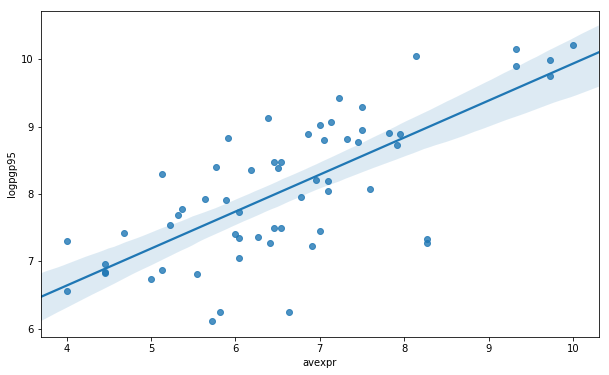

In [16]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(10, 6))
sns.regplot(x="avexpr", y="logpgp95", data=df, ax=ax)

As expected, the paper's main findings are very significant - with p-values being almost 0. This shows that settler mortality rate affects the avg. protection against expropriation risk (institution quality) and institution quality affects the log GDP per capita.

### Now to test for our hypothesis that:
#### 1. Ethnographic factors also impact the GDP

We expect that with greater ethnolinguistic diversity, there would be more chance for civil unrest which would make running the country difficult - hence institutions would be weaker and thus GDP would be lower

In [128]:
print(smf.ols('logpgp95 ~ Ethnic + Religion + Language + avexpr', data = df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     27.54
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           3.71e-13
Time:                        00:40:49   Log-Likelihood:                -65.606
No. Observations:                  67   AIC:                             141.2
Df Residuals:                      62   BIC:                             152.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5076      0.528     10.422      0.0

### Findings:

It looks like ethnicity and religion are not significant regressors of GDP; however, language turned out to be a very significant (p-value <0.01) regressor of GDP. That means countries with more diverse languages tended to do worse than those with fewer languages. Possible explanations could be that with more languages, there is more disconnect between linguistic groups in the country. Maybe this would make it more difficult to implement standardized policies as people speak different languages and it could be hard to unify them to follow the economic policies.  

We wanted to see whether this effect held true for each continent:

In [133]:
# Asia
print(smf.ols('logpgp95 ~ Ethnic + Religion + Language + avexpr', data = Asia).fit().summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     2.778
Date:                Wed, 19 Dec 2018   Prob (F-statistic):             0.0935
Time:                        00:55:18   Log-Likelihood:                -16.057
No. Observations:                  14   AIC:                             42.11
Df Residuals:                       9   BIC:                             45.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1605      1.634      2.546      0.0

/Users/Sweta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [134]:
# Africa
print(smf.ols('logpgp95 ~ Ethnic + Religion + Language + avexpr', data = Africa).fit().summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     3.409
Date:                Wed, 19 Dec 2018   Prob (F-statistic):             0.0250
Time:                        00:55:33   Log-Likelihood:                -26.441
No. Observations:                  28   AIC:                             62.88
Df Residuals:                      23   BIC:                             69.54
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8101      1.007      6.764      0.0

In [135]:
# South America
print(smf.ols('logpgp95 ~ Ethnic + Religion + Language + avexpr', data = South_America).fit().summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     3.079
Date:                Wed, 19 Dec 2018   Prob (F-statistic):             0.0547
Time:                        00:55:44   Log-Likelihood:                -5.5014
No. Observations:                  18   AIC:                             21.00
Df Residuals:                      13   BIC:                             25.45
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0876      0.821      7.412      0.0

/Users/Sweta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


### Findings:

Interestingly, none of the continent regressions showed the same pattern of having language as a significant regressor. Maybe the trend in the overall data set reflects the trend in Europe and the 'Neo-Europes' like Australia and Canada and these countries largely speak English. 

We wanted to see in case there was any relationship between the institution quality and these ethnographic factors, even though the correlation analysis before did not render very strong results:

In [67]:
print(smf.ols('avexpr ~ Ethnic + Religion + Language + logem4', data = df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 avexpr   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     6.906
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           0.000129
Time:                        19:47:15   Log-Likelihood:                -97.359
No. Observations:                  63   AIC:                             204.7
Df Residuals:                      58   BIC:                             215.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6777      0.658     13.183      0.0

### Findings

It doesn't look like any of them affect the institution quality - except the mortality rate and the religion variable (at a 10% sig. level) but we'll still check by continent:

In [70]:
# Asia
print(smf.ols('avexpr ~ Ethnic + Religion + Language + logem4', data = Asia).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 avexpr   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     2.052
Date:                Tue, 18 Dec 2018   Prob (F-statistic):              0.206
Time:                        19:55:47   Log-Likelihood:                -13.159
No. Observations:                  11   AIC:                             36.32
Df Residuals:                       6   BIC:                             38.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6051      2.227      2.517      0.0

/Users/tianxiong/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [71]:
# Africa
print(smf.ols('avexpr ~ Ethnic + Religion + Language + logem4', data = Africa).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 avexpr   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.8157
Date:                Tue, 18 Dec 2018   Prob (F-statistic):              0.529
Time:                        19:55:48   Log-Likelihood:                -39.875
No. Observations:                  27   AIC:                             89.75
Df Residuals:                      22   BIC:                             96.23
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7786      1.134      5.978      0.0

In [136]:
# South America
print(smf.ols('avexpr ~ Ethnic + Religion + Language + logem4', data = South_America).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 avexpr   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.222
Date:                Wed, 19 Dec 2018   Prob (F-statistic):              0.349
Time:                        01:00:06   Log-Likelihood:                -19.513
No. Observations:                  18   AIC:                             49.03
Df Residuals:                      13   BIC:                             53.48
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5777      3.171      3.651      0.0

/Users/Sweta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


### Findings

None of the factors were significant in Africa or South America. Religion was significant in Asia at the 10% level. Possible explanations could be that greater religious diversity could promote tolerance and cooperation when making economic policies, which leads to more stable institutions. A good example of this would be India, which has a great religious diversity apart from being a former British colony that is performing very well economically in the past decade. 



## Limitations and Further Research:

The main limitation with our analyses is that we did not run 2-stage least squares (2SLS) regressions to test for endogeneity between variables. In the paper, because mortality affected institution quality and institution quality affected GDP, the researchers used 2SLS regressions to show this relationship more precisely. Then they also used instrumental variables regressions to control for endogeneity (when one variable affects both the dependent and the independent variable) by including them in the second stage. However, since we didn't conduct our tests using IV and 2SLS regressions, the results may be a little biased.

So for future consideration, it would be helpful to see whether having 2-stage least square regressions and instumental variables improve our predictions and R^2 values. Maybe by controlling for our Ethnicity, Religion and Language variables, we can get more accurate/unbiased results. For further research, it would also be interesting to see if there are any other variables that affect institution quality - like geography or climate. 

## Conclusion 

Even though our correlation matrices show that mortality and institutional quality are two factors that are significantly correlated with GDP in all three continents, causal effects can not be established based on our first-stage least squares regressions. We hypothesized that institutional quality are affected by ethnographic factors such as language, ethnic and religious diversity, but the regression output shows that none of the variables are significant in our model (except for Religion in Asia). 

In the future, we would need to run 2-stage least squares regressions to improve the validity of the our analysis. Introducing more variables to our analysis in the future could also help us capture all factors that have an impact on Log GDP. Multicollinearity among variables might further affect the regression output, therefore it would be helpful to use partial least squares regressions or principal component analysis by combining similar variables.